<a href="https://colab.research.google.com/github/yaxh-k/Case_study_BMW/blob/main/BMW_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES

In [67]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

sns.set()


Importing Data Files (Given)


In [4]:


df1 = pd.read_csv ('products.csv')
df2 = pd.read_csv ('order_products.csv')
df3 = pd.read_csv ('orders.csv')
df4 = pd.read_csv ('departments.csv')



Merging Above datasets 

In [6]:

table = pd.merge(df1,df2,on='product_id')
table2 = pd.merge(table,df4,on='department_id')
table3 = pd.merge(table2, df3, on='order_id')

#Final Merged DATASET
table3 


,product_id,department_id,product_name,order_id,add_to_cart_order,reordered,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,61,19,cookies cakes,1083,9,0,snacks,107844,5,0,9,6.0
1,107,19,chips pretzels,1083,2,1,snacks,107844,5,0,9,6.0
2,31,7,refrigerated,1083,4,0,beverages,107844,5,0,9,6.0
3,64,7,energy sports drinks,1083,6,1,beverages,107844,5,0,9,6.0
4,77,7,soft drinks,1083,5,0,beverages,107844,5,0,9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,18,10,bulk dried fruits vegetables,2170304,1,1,bulk,107436,15,5,13,4.0
2019497,18,10,bulk dried fruits vegetables,2296901,1,1,bulk,108571,20,6,13,8.0
2019498,18,10,bulk dried fruits vegetables,3201443,1,1,bulk,29207,11,0,10,30.0
2019499,18,10,bulk dried fruits vegetables,3275452,1,1,bulk,59269,19,1,10,5.0


Checking Co-relation Using Heatmap

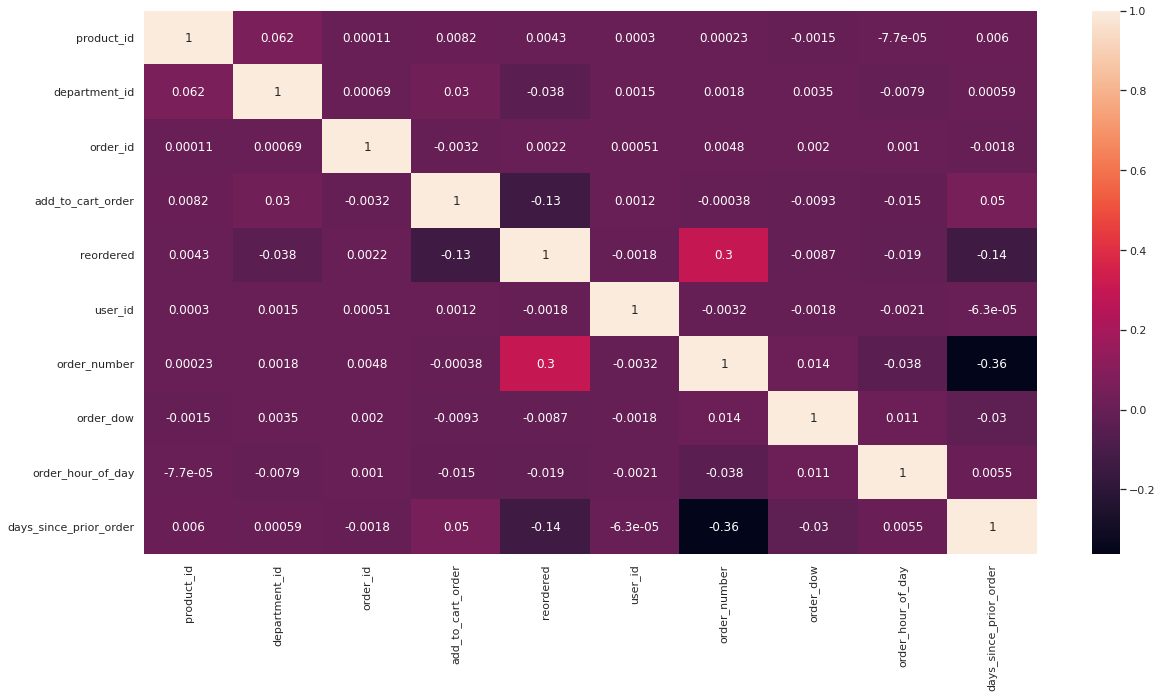

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(table3.corr(),annot=True)


Checking Co-relation Using Churn Label (Hoping to find something)

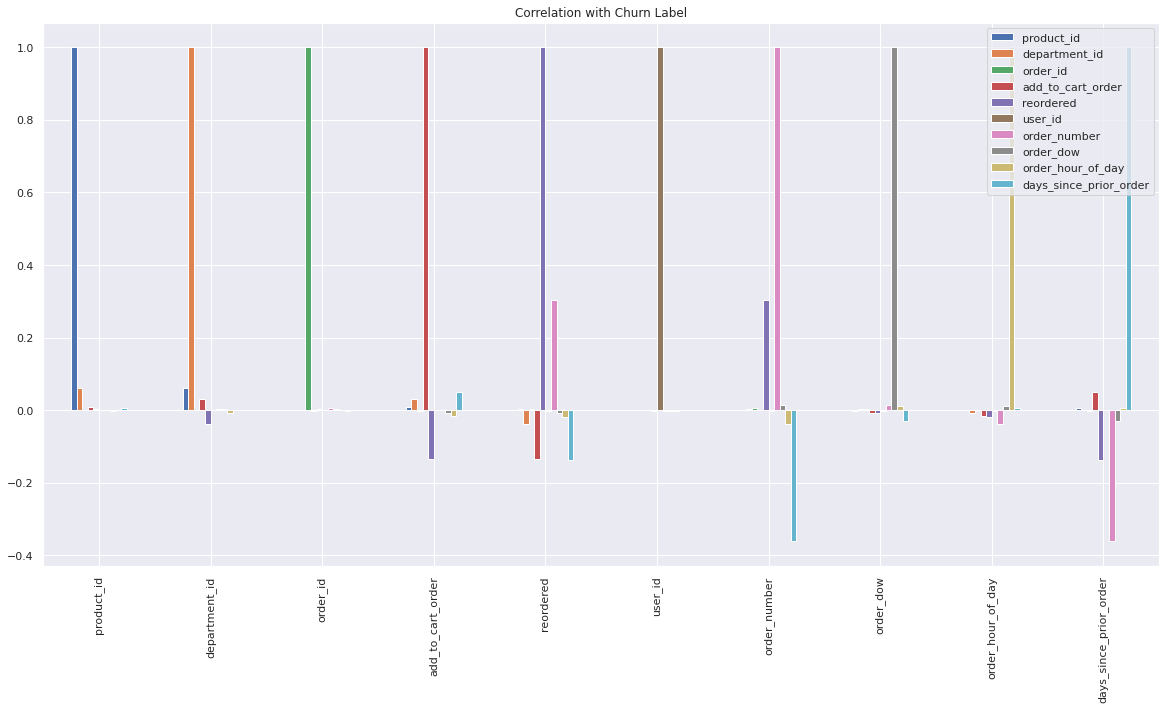

In [42]:
table3.corr().plot(kind='bar', figsize=(20,10), title= "Correlation with Churn Label")


In [8]:
#table3.to_csv('Customer Purchase Data [BMW Case Study].csv')
#Saved it as a CSV then Imported it back


df5 = pd.read_csv('Customer Purchase Data [BMW Case Study].csv')

    

Finding Most Ordered Products

In [15]:
#Creating two dictionaries, saving names in pn and saving counts in pc 

pn = Counter(df5['product_name']).keys()
pc = Counter(df5['product_name']).values()


print(pn)
print(pc)


dict_keys(['cookies cakes', 'chips pretzels', 'refrigerated', 'energy sports drinks', 'soft drinks', 'yogurt', 'soy lactosefree', 'dish detergents', 'pasta sauce', 'frozen produce', 'cleaning products', 'grains rice dried goods', 'packaged vegetables fruits', 'fresh vegetables', 'fresh fruits', 'fresh herbs', 'doughs gelatins bake mixes', 'water seltzer sparkling water', 'coffee', 'frozen appetizers sides', 'specialty cheeses', 'milk', 'cream', 'eggs', 'trash bags liners', 'diapers wipes', 'baby food formula', 'packaged poultry', 'hot dogs bacon sausage', 'instant foods', 'hot cereal pancake mixes', 'canned meals beans', 'fresh dips tapenades', 'breakfast bakery', 'crackers', 'spreads', 'juice nectars', 'frozen breakfast', 'digestion', 'butter', 'bread', 'popcorn jerky', 'candy chocolate', 'other creams cheeses', 'cereal', 'packaged produce', 'lunch meat', 'pickled goods olives', 'tea', 'kosher foods', 'tortillas flat bread', 'energy granola bars', 'baking ingredients', 'nuts seeds dri

In [18]:
#saved pc values in a
a = 0
a = np.array(a)

a = 14745, 45306, 18194, 3741, 11615, 46208, 18443, 2771, 6955, 14647, 3172, 4015, 49989, 87270, 102712, 8674, 3814, 24621, 6418, 7232, 2712, 24492, 9073, 12276, 882, 733, 12324, 3224, 9705, 7500, 5162, 8253, 13698, 8460, 28574, 9697, 10479, 8366, 835, 7137, 18604, 10415, 16511, 9490, 13871, 5384, 13461, 3457, 8043, 337, 6374, 28639, 8670, 10486, 7119, 569, 10931, 1911, 1218, 803, 32642, 5285, 13782, 6092, 16633, 1285, 1370, 8342, 1159, 4999, 7593, 10394, 258, 3797, 651, 1652, 1972, 1962, 1976, 3671, 3499, 2239, 4350, 1836, 2384, 3053, 6720, 3449, 580, 617, 1392, 6193, 1203, 1264, 1822, 3325, 3814, 605, 941, 659, 878, 1107, 2230, 313, 2599, 1999, 684, 2341, 3272, 3440, 515, 670, 724, 510, 706, 294, 1444, 600, 1733, 256, 735, 624, 257, 905, 1013, 164, 479, 389, 208, 474, 171, 463, 310, 191
np.argmax(a)  #Max position

#Then Counted 0-14 on the ouput of pn 
#Therefore: Fresh Fruits

14

Finding Most Ordered Department

In [25]:
#Creating two dictionaries, saving names in pn and saving counts in pc 

dn = Counter(df5['department']).keys()
dc = Counter(df5['department']).values()

print(dn)
print(dc)


dict_keys(['snacks', 'beverages', 'dairy eggs', 'household', 'dry goods pasta', 'frozen', 'produce', 'pantry', 'babies', 'meat seafood', 'breakfast', 'canned goods', 'deli', 'bakery', 'personal care', 'international', 'bulk', 'alcohol', 'pets', 'missing', 'other'])
dict_values([168768, 83795, 163917, 21225, 28097, 74560, 254029, 55744, 13572, 20409, 26119, 31665, 36394, 38394, 13532, 8199, 1032, 2930, 2840, 2341, 1013])


In [27]:
#saved dc values in b

b = 168768, 83795, 163917, 21225, 28097, 74560, 254029, 55744, 13572, 20409, 26119, 31665, 36394, 38394, 13532, 8199, 1032, 2930, 2840, 2341, 1013

np.argmax(b)  #Max position

#Then Counted 0-6 on the ouput of dn 
#Therefore: Produce

#I made a mistake in counting, counted the wrong variable [It is not Indian Foods (minimum of Most Ordered Products)]



6

Grouped The Most Co-related Data

In [29]:
Correlated_colums = table3.groupby(['order_number','reordered','days_since_prior_order']).median()   #large data so not mean
Correlated_colums

#Saved it onto a CSV 
#k.to_csv('corr_cols.csv')


product_id  ...  order_hour_of_day
order_number reordered days_since_prior_order              ...                   
2            0         0.0                           79.5  ...               15.5
                       1.0                           78.0  ...               14.0
                       2.0                           83.0  ...               14.0
                       3.0                           83.0  ...               14.0
                       4.0                           83.0  ...               14.0
...                                                   ...  ...                ...
100          1         5.0                           83.0  ...               10.0
                       6.0                           92.0  ...               11.0
                       7.0                           80.5  ...               13.5
                       8.0                           83.0  ...               13.0
                       9.0                          103.0  ...               17.0

[4404 rows x 7 columns]

Grouped the above with user_id and product_id and Created New Order ID's for each customer To Predict 'Purchasing Power' (As a total of all the order ID's possible and the rest)

[Data is recorded uneducatedly. Therefore, I have introduced New metrics as sum for new individuality to represent as a collection]

In [35]:
up = Correlated_colums.groupby(['user_id','product_id']).sum()
up

#Saved it onto a CSV 
#up.to_csv('user_product.csv')

department_id   order_id  ...  order_dow  order_hour_of_day
user_id  product_id                            ...                              
852.0    38.0                  4.0  3145099.0  ...        2.0               19.0
         60.0                  4.0  3145099.0  ...        2.0               19.0
1538.0   67.0                  7.0  2618927.0  ...        1.0               10.0
         107.0                19.0  2618927.0  ...        1.0               10.0
1837.0   27.5                  5.5  1172675.0  ...        1.0               12.0
...                            ...        ...  ...        ...                ...
204455.0 83.0                 13.0  1547472.0  ...        2.0               10.0
         88.5                  7.0  1547472.0  ...        2.0               10.0
204485.0 23.5                 11.5  1979473.0  ...        2.0               10.0
         50.0                  4.0  1979473.0  ...        2.0               10.0
204811.0 21.0                 25.0   645598.0  ...        6.0               38.0

[4210 rows x 5 columns]

Co-relation of above (Only Selecting the ones with highest Co-relation)

[As we can see now the Data has started to make sense]

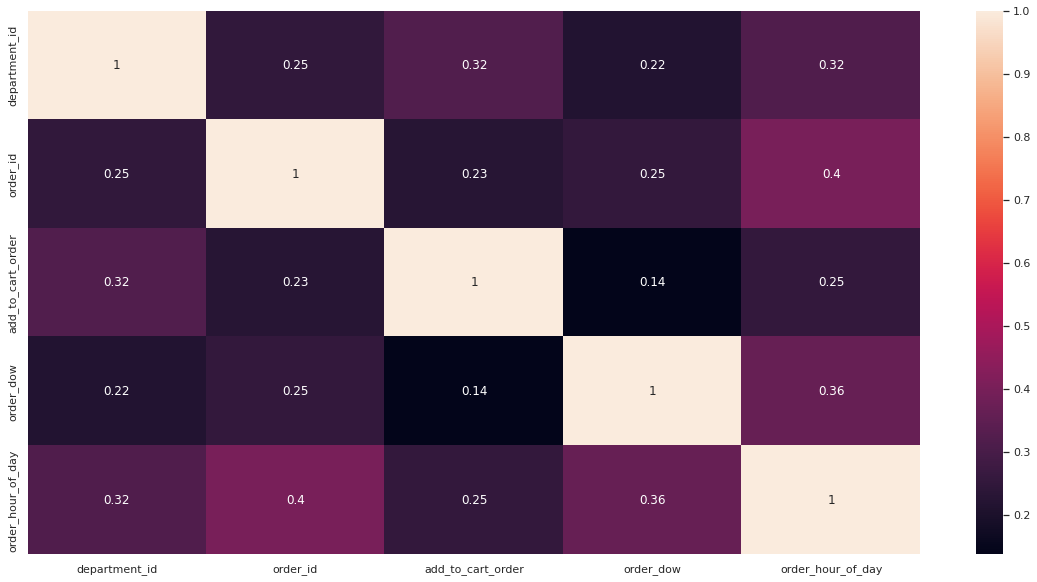

In [43]:
plt.figure(figsize = (20,10))
sns.heatmap(up.corr(),annot=True)


Clustering

No handles with labels found to put in legend.


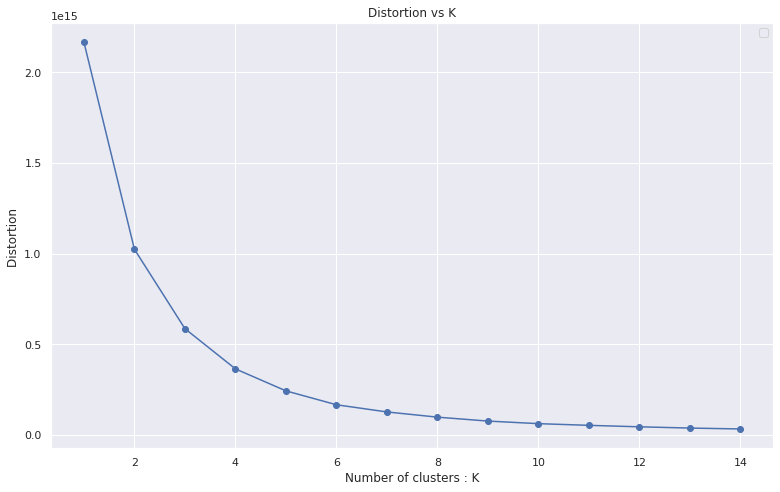

In [45]:
inertia_list = []
xl = up.values


#Finding Optimal Number of Clusters

for k in range (1,15):
    kmeans_classifier = KMeans(n_clusters = k)
    y_means = kmeans_classifier.fit_predict(xl)
    centroids = kmeans_classifier.cluster_centers_
    inertia = kmeans_classifier.inertia_
    inertia_list.append(inertia)





plt.figure(figsize = (11,7))
plt.plot(range(1,15), inertia_list, marker ='o')
plt.legend()
plt.xlabel('Number of clusters : K')
plt.ylabel('Distortion ')
plt.title('Distortion vs K')
plt.tight_layout()
plt.show()



#Now we can say, k=4 is the optimal (Using Knee-Method) [From plot below]

Cluster Plot (Using K-means)

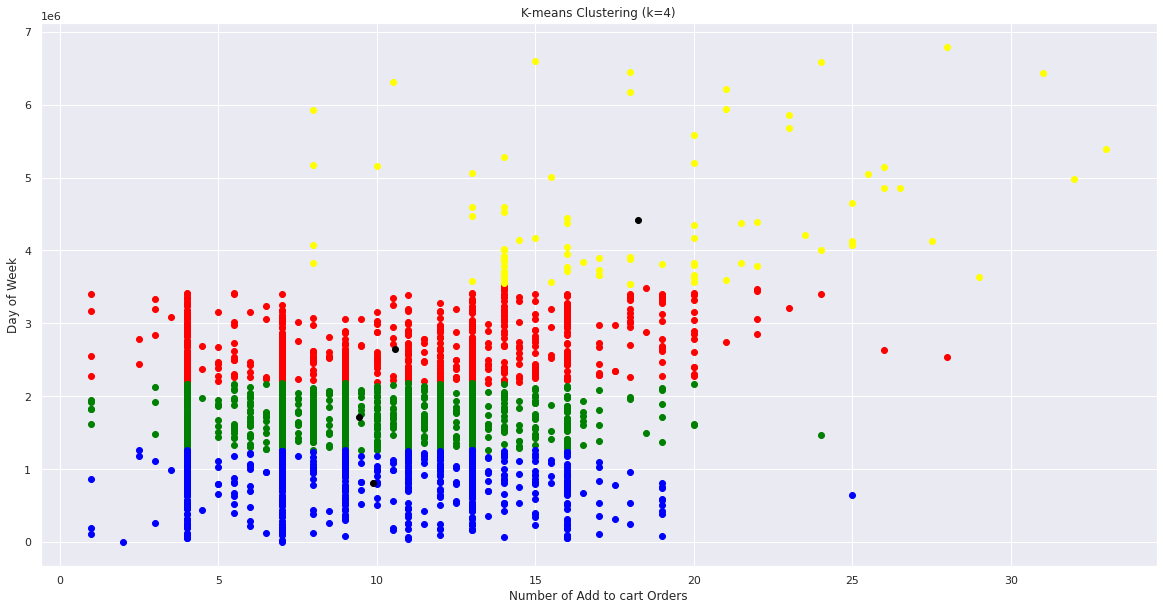

In [47]:
plt.figure(figsize = (20,10))


xl = up.values
kmeans_classifier = KMeans(n_clusters = 4)
y_kmeans = kmeans_classifier.fit_predict(xl)
centroids = kmeans_classifier.cluster_centers_







plt.scatter (xl[ y_kmeans == 0 , 0] , xl[ y_kmeans == 0 , 1]  , c = 'red',  label = 'Red')
plt.scatter (xl[ y_kmeans == 1 , 0] , xl[ y_kmeans == 1 , 1]  , c = 'green', label = 'Green')
plt.scatter (xl[ y_kmeans == 2 , 0] , xl[ y_kmeans == 2 , 1]  , c = 'blue', label = 'blue')
plt.scatter (xl[ y_kmeans == 3 , 0] , xl[ y_kmeans == 3 , 1]  , c = 'yellow', label = 'yellow')
plt.scatter ( centroids [: , 0] , centroids [: ,1] , c= 'black', label = 'Centroids')
plt.title('K-means Clustering (k=4)')
plt.xlabel('Number of Add to cart Orders')
plt.ylabel('Day of Week')
plt.show()



Now using order id and day of week we can predict which order will be ordered more than the avg or not;

As our label is number of Add to Cart orders = 1 (if>20) else 0

In [48]:
#Creating Label
t = []

for x in up['add_to_cart_order']:
    if(x>20):
        t.append(1)
    else:
        t.append(0)


up["Label"] = t
up



#User-Product Table with Label

department_id   order_id  ...  order_hour_of_day  Label
user_id  product_id                            ...                          
852.0    38.0                  4.0  3145099.0  ...               19.0      0
         60.0                  4.0  3145099.0  ...               19.0      0
1538.0   67.0                  7.0  2618927.0  ...               10.0      0
         107.0                19.0  2618927.0  ...               10.0      0
1837.0   27.5                  5.5  1172675.0  ...               12.0      0
...                            ...        ...  ...                ...    ...
204455.0 83.0                 13.0  1547472.0  ...               10.0      0
         88.5                  7.0  1547472.0  ...               10.0      1
204485.0 23.5                 11.5  1979473.0  ...               10.0      0
         50.0                  4.0  1979473.0  ...               10.0      0
204811.0 21.0                 25.0   645598.0  ...               38.0      0

[4210 rows x 6 columns]

Using Logistic Regression For Predictions

Initializing Train/Test Data + Scaling

In [50]:
X = up[['order_id','order_dow']].values
y = up[['Label']].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=64)



#Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creating Classification Report Functions to Call them After Predictions of any Model

In [55]:

def metrics(y_test, predictions):
    
    print(classification_report(y_test,predictions))
    print("####### Confusion Matrix #######\n",confusion_matrix(y_test,predictions))
    print("Area Under Curve {}\n".format(roc_auc_score(y_test,predictions)))
    
    TN = confusion_matrix(y_test,predictions)[0][0]
    FP = confusion_matrix(y_test,predictions)[0][1]
    FN = confusion_matrix(y_test,predictions)[1][0]
    TP = confusion_matrix(y_test,predictions)[1][1]
    
    TPR = round(TP/(TP + FN),3)
    TNR = round(TN/(TN + FP),3)
    Accuracy = round((TN+TP)/ (len(y_test)),4)
    
    

    return TPR, TNR, Accuracy





#Accuracy Of Model Prediction
def cross_validate(e, X_train,  y_train):
    accuracies = cross_val_score(estimator = e, X = X_train, y = y_train, cv = 10)
    print("\nStandard Deviation: {:.2f} %".format(accuracies.std()*100))
    
    return accuracies.mean()*100    

Logistic Regression Function

In [68]:

def log_reg(X_train, y_train, X_test, y_test):
    print("\n############################## LogisticRegression ##############################\n")
    
    logmodel = LogisticRegression()
    logmodel.fit(X_train_scaled,y_train)
    lg_predict = logmodel.predict(X_test_scaled)
    TPR, TNR, log_accuracy = metrics(y_test, lg_predict)
    log_avg_accuracy = cross_validate(logmodel, X_train_scaled,  y_train)

    print(f"\nTPR = {TPR} \nTNR = {TNR} \nAccuracy = {round(log_accuracy*100,2)}%")
    print("\nAverage Accuracy using 10-fold Cross validation = {:.2f}%".format(log_avg_accuracy))


    return log_accuracy, log_avg_accuracy

log_accuracy, log_avg_accuracy = log_reg(X_train_scaled, y_train, X_test_scaled, y_test)






############################## LogisticRegression ##############################

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1377
           1       0.00      0.00      0.00        13

    accuracy                           0.99      1390
   macro avg       0.50      0.50      0.50      1390
weighted avg       0.98      0.99      0.99      1390

####### Confusion Matrix #######
 [[1377    0]
 [  13    0]]
Area Under Curve 0.5


Standard Deviation: 0.16 %

TPR = 0.0 
TNR = 1.0 
Accuracy = 99.06%

Average Accuracy using 10-fold Cross validation = 98.69%
